In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# importa o resultado da classicação do k-measn (od_2017_norm_kmeans.csv)
df = pd.read_csv('od_2017_norm_kmeans3.csv')#, index_col=0)
df

,Zona,Nome,População,Escolares,Empregos,Área (ha),Per Capita,cluster
0,1,Sé,0.0207,0.1120,0.7111,0.002746,0.2159,0
1,2,Parque Dom Pedro,0.0361,0.0252,0.5132,0.005465,0.2393,0
2,3,Praça João Mendes,0.1085,0.0422,0.1836,0.002296,0.3045,0
3,4,Ladeira da Memória,0.1526,0.0198,0.2232,0.003612,0.5103,1
4,5,República,0.0947,0.0304,0.8856,0.003604,0.4287,1
...,...,...,...,...,...,...,...,...
338,339,Cidade Universitária,0.0000,0.9549,0.2661,0.028109,0.0000,2
339,340,Butantã,0.0490,0.0323,0.1346,0.009959,0.6644,1
340,341,Jardim Caxingui,0.0668,0.0655,0.0870,0.008659,0.4633,1
341,342,Jardim Bonfiglioli,0.2261,0.0932,0.1471,0.015386,0.3857,0


In [4]:
# importa o shapefile
df_mapa = gpd.read_file('zonas_cidade_sp.shp')

In [5]:
df_mapa


,od_id,od_nome,od_area,od_ano,od_municip,geometry
0,474,Santa Rita,5614.14,2017,10,"MULTIPOLYGON (((316050.769 7356982.413, 316043..."
1,473,Cipó,2226.59,2017,10,"MULTIPOLYGON (((319466.548 7364656.634, 319476..."
2,472,Embu-Guaçu,7756.92,2017,10,"MULTIPOLYGON (((318859.228 7370415.861, 318838..."
3,468,Itapecerica da Serra,7478.56,2017,16,"MULTIPOLYGON (((316290.045 7379370.633, 316290..."
4,299,Marsilac,20795.96,2017,36,"MULTIPOLYGON (((319205.588 7359408.669, 319228..."
...,...,...,...,...,...,...
393,365,Várzea do Palácio,646.76,2017,15,"MULTIPOLYGON (((348043.601 7402825.988, 348017..."
394,364,Cumbica,689.34,2017,15,"MULTIPOLYGON (((350728.453 7402250.067, 350659..."
395,378,Pimentas,1685.56,2017,15,"MULTIPOLYGON (((354635.453 7403408.930, 354617..."
396,381,Morro dos Macacos,3533.19,2017,15,"MULTIPOLYGON (((340328.471 7409872.345, 340338..."


In [6]:
# Se 'od_id' for 'object' e você deseja convertê-lo para 'int64' (substitua por 'str' para conversão contrária)
df_mapa['od_id'] = df_mapa['od_id'].astype('int64')  # converte para inteiro

In [7]:
# faz o join entre o shapefile e o resultado da classificação, resultando em um gdf
# a coluna od_id é o identificador da zona no shapefile, 
# o indicador "Zona" é o identificador da zona na base de dados
df_mapa_merged = df_mapa.merge(df, left_on='od_id', right_on='Zona ')


In [8]:
df_mapa_merged

,od_id,od_nome,od_area,od_ano,od_municip,geometry,Zona,Nome,População,Escolares,Empregos,Área (ha),Per Capita,cluster
0,299,Marsilac,20795.96,2017,36,"MULTIPOLYGON (((319205.588 7359408.669, 319228...",299,Marsilac,0.0530,0.0155,0.0216,1.000000,0.1525,0
1,298,Parelheiros,11667.08,2017,36,"POLYGON ((321658.159 7358973.174, 321591.686 7...",298,Parelheiros,0.9224,0.7499,0.2738,0.561026,0.1364,2
2,295,Belmira Marin,1236.83,2017,36,"POLYGON ((331489.897 7370894.532, 331380.899 7...",295,Belmira Marin,0.7231,0.4745,0.1938,0.059475,0.1705,2
3,292,Vila Natal,415.09,2017,36,"POLYGON ((325538.720 7370786.459, 325539.083 7...",292,Vila Natal,0.4156,0.2446,0.1054,0.019960,0.1500,2
4,291,Jardim Presidente,762.54,2017,36,"POLYGON ((327570.073 7374905.837, 327566.783 7...",291,Jardim Presidente,0.4801,0.3682,0.1788,0.036668,0.2085,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,180,Ermelino Matarazzo,448.82,2017,36,"POLYGON ((346704.561 7401372.956, 346672.657 7...",180,Ermelino Matarazzo,0.4503,0.2039,0.1430,0.021582,0.1972,2
339,187,Parque Cruzeiro do Sul,249.91,2017,36,"POLYGON ((349870.753 7402237.779, 349872.518 7...",187,Parque Cruzeiro do Sul,0.3056,0.1564,0.0986,0.012017,0.1433,0
340,178,USP Leste I,50.18,2017,36,"POLYGON ((346766.647 7402684.262, 346767.991 7...",178,USP Leste I,0.0000,0.0520,0.0128,0.002413,0.0000,0
341,179,USP Leste II,122.83,2017,36,"POLYGON ((346845.258 7402876.339, 346910.362 7...",179,USP Leste II,0.0000,0.0000,0.0000,0.005906,0.0000,0


<Axes: >

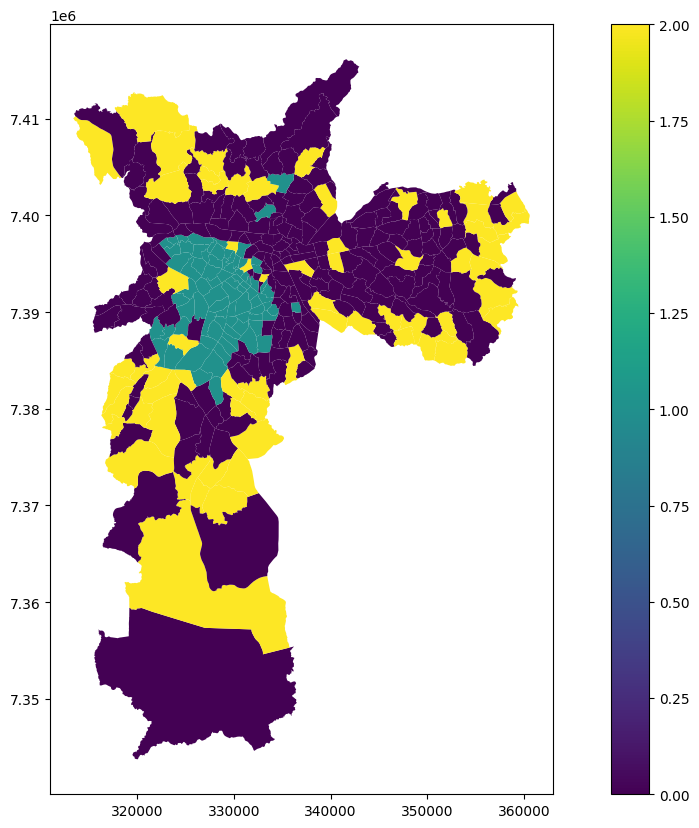

In [9]:
# gerar um plot bonito em que a cor é definida pela coluna cluster
# e a legenda é definida automaticamente
df_mapa_merged.plot(column='cluster', legend=True, figsize=(15, 10))

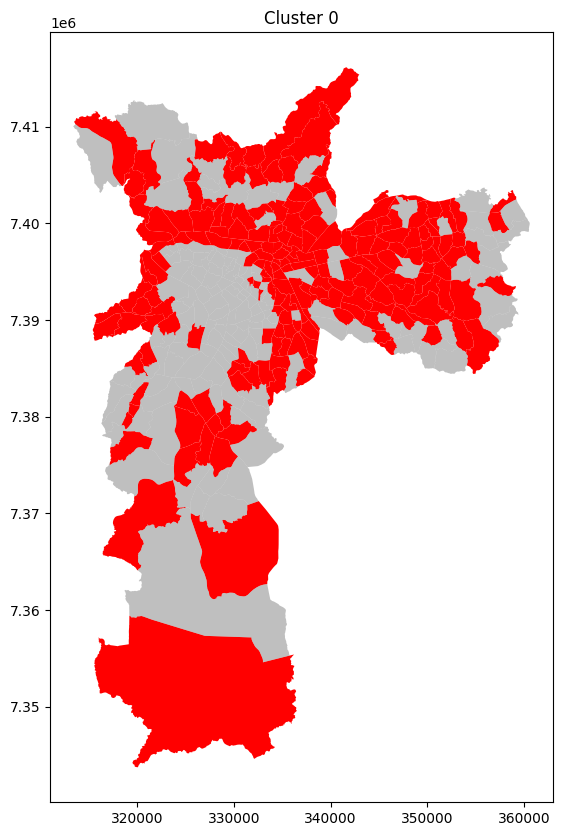

In [10]:
import matplotlib.pyplot as plt

for k in [0]:
    # Cria uma figura e um conjunto de subtramas (eixos)
    fig, ax = plt.subplots(figsize=(15, 10))

    # Plot o cluster 1 colorido e os outros cluster cinzas com opacidade reduzida no mesmo eixo
    df_mapa_merged[df_mapa_merged['cluster'] == k].plot(ax=ax, color='red')
    df_mapa_merged[df_mapa_merged['cluster'] != k].plot(ax=ax, color='gray', alpha=0.5)

    # Mostra o gráfico
    plt.title(f"Cluster {k}")
    plt.show()


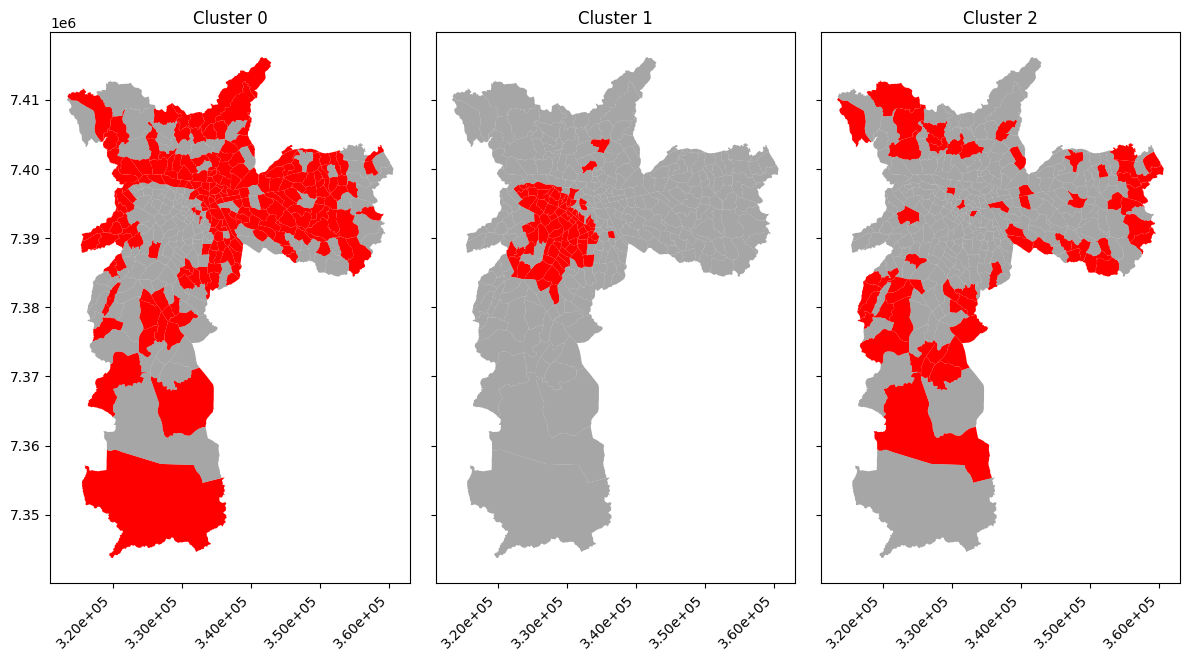

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Número de clusters
num_clusters = 3

# Cria uma única figura com subplots. 10 subplots (2x5 grid), define o tamanho da figura
# e faz com que todos os gráficos na mesma linha compartilhem o mesmo eixo y.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 9), sharey='row', sharex='col')  # 'sharey=row' faz com que os plots na mesma linha compartilhem o eixo y

# Achatar a matriz de eixos (axes), se necessário, para facilitar a iteração
axes = axes.flatten()

# Itera sobre o número de clusters e os eixos
for k, ax in zip(range(num_clusters), axes):
    # Plot o cluster específico colorido e os outros clusters cinzas com opacidade reduzida no mesmo eixo
    df_mapa_merged[df_mapa_merged['cluster'] == k].plot(ax=ax, color='red')
    df_mapa_merged[df_mapa_merged['cluster'] != k].plot(ax=ax, color='gray', alpha=0.7)
    
    # Define o título para cada subplot
    ax.set_title(f"Cluster {k}")

    # (Opcional) Se os valores do eixo x forem muito grandes, você pode querer formatá-los usando notação científica
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2e}'))
    
    # Rotaciona os ticks no eixo x para evitar sobreposição
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')  # Alinha os rótulos à direita para uma melhor legibilidade

# Ajusta o layout para que os títulos/etiquetas não se sobreponham e mostra o gráfico
plt.tight_layout()
# save to svg 
plt.savefig('clusters.svg', format='svg', dpi=1200)
plt.show()


In [13]:
# TODO: Precisa calcular a média por cluster aqui também.

In [14]:
names = ["Zona ", "Nome"]  

In [15]:
df

,Zona,Nome,População,Escolares,Empregos,Área (ha),Per Capita,cluster
0,1,Sé,0.0207,0.1120,0.7111,0.002746,0.2159,0
1,2,Parque Dom Pedro,0.0361,0.0252,0.5132,0.005465,0.2393,0
2,3,Praça João Mendes,0.1085,0.0422,0.1836,0.002296,0.3045,0
3,4,Ladeira da Memória,0.1526,0.0198,0.2232,0.003612,0.5103,1
4,5,República,0.0947,0.0304,0.8856,0.003604,0.4287,1
...,...,...,...,...,...,...,...,...
338,339,Cidade Universitária,0.0000,0.9549,0.2661,0.028109,0.0000,2
339,340,Butantã,0.0490,0.0323,0.1346,0.009959,0.6644,1
340,341,Jardim Caxingui,0.0668,0.0655,0.0870,0.008659,0.4633,1
341,342,Jardim Bonfiglioli,0.2261,0.0932,0.1471,0.015386,0.3857,0


In [16]:
# calcular um groupBy do df pela coluna 'cluster', calculando a média, mediana e desvpad
# somente colunas que não sejam 'cluster' ou 'Zona' ou 'nome'

# Primeiro, vamos remover as colunas que você não quer incluir nos cálculos
colunas_calculo = [col for col in df.columns if col not in names]

# Agora, você pode realizar o groupby e calcular as estatísticas necessárias
resultados = df.groupby('cluster')[colunas_calculo].agg(['mean', 'median', 'std'])

# imprimir resultados destacando o nome de cada variável
for col in colunas_calculo:
    print(f"Variável: {col}")
    print(resultados[col])
    print('\n')

Variável: População
             mean  median       std
cluster                            
0        0.170506  0.1696  0.111181
1        0.107965  0.0909  0.067090
2        0.498914  0.4900  0.218669


Variável: Escolares
             mean   median       std
cluster                             
0        0.118322  0.11000  0.087527
1        0.103020  0.07505  0.094385
2        0.396973  0.35235  0.210798


Variável: Empregos
             mean   median       std
cluster                             
0        0.137136  0.12590  0.088770
1        0.234571  0.18905  0.198037
2        0.208298  0.20625  0.064148


Variável: Área (ha)
             mean    median       std
cluster                              
0        0.022166  0.012780  0.074846
1        0.007796  0.006539  0.005032
2        0.036814  0.022264  0.069852


Variável: Per Capita
             mean   median       std
cluster                             
0        0.223565  0.22020  0.091439
1        0.606372  0.59065  0.128633
2   